In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [4]:
top = md.load_psf('/home/lmacaya/Escritorio/hGR/hGR_MD_2/hGR_popcwi.psf')
traj = md.load_dcd('/media/lmacaya/Elements/hGR_MD_2/run/hGR_popcwi_md_200ns.dcd',\
                   top, atom_indices=top.select('backbone'))

In [5]:
distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i)
print('Max pairwise rmsd: %f nm' % np.max(distances))

Max pairwise rmsd: 0.758313 nm


In [6]:
linkage = scipy.cluster.hierarchy.linkage(distances, method='average')

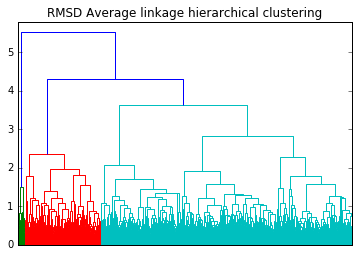

In [7]:
plt.title('RMSD Average linkage hierarchical clustering')
plot = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent')
plt.savefig('/home/lmacaya/Escritorio/hGR_Clustering.png', dpi=1000)

In [89]:
linkage = scipy.cluster.hierarchy.ward(distances)

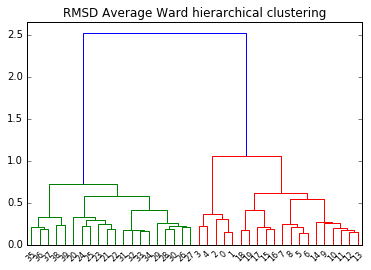

In [90]:
plt.title('RMSD Average Ward hierarchical clustering')
_ = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=False, count_sort='descendent')

In [99]:
linkage = scipy.cluster.hierarchy.centroid(distances)

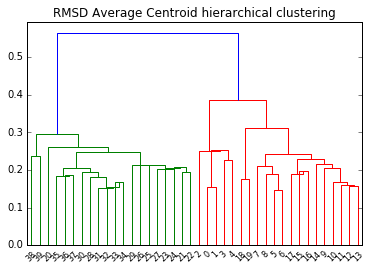

In [100]:
plt.title('RMSD Average Centroid hierarchical clustering')
_ = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=False, count_sort='descendent')